# **Assignment Task**
# Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.


In [1]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla - MLR.csv to ToyotaCorolla - MLR.csv


# Step 1: Exploratory Data Analysis (EDA) and Data Preprocessing

In [2]:
#First, let's import the necessary libraries and load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


MISSING VALUES
Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64
SUMMARY STATISTICS
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436

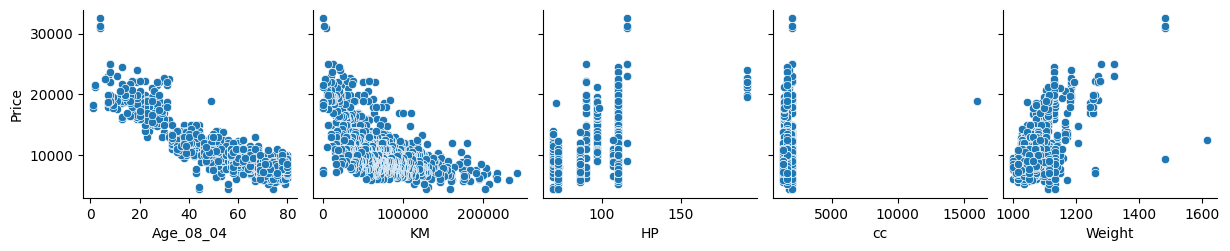

In [3]:
#Next, let's perform EDA to gain insights into the dataset

#Missing values
print("MISSING VALUES")
print(df.isnull().sum())

# Summary statistics
print("SUMMARY STATISTICS")
print(df.describe())

# Visualize the distribution of variables
print("DISTRIBUTION OF VARIABLES")
sns.pairplot(df, x_vars=['Age_08_04', 'KM', 'HP', 'cc', 'Weight'], y_vars='Price')
plt.show()

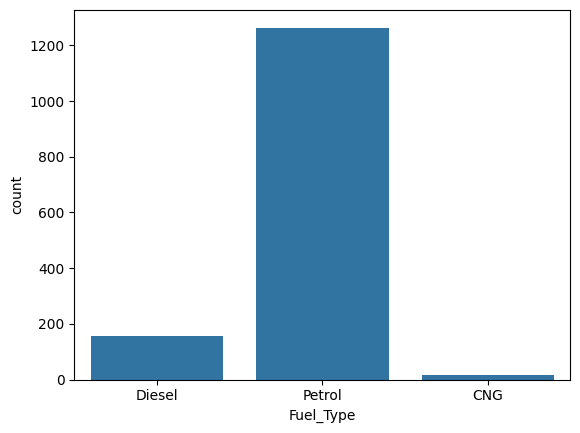

In [4]:
# Visualize the categorical variables
sns.countplot(x='Fuel_Type', data=df)
plt.show()



```
# From the EDA, we can see that there are some correlations between the
variables, and the categorical variables have a decent distribution.
```



In [5]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [9]:
#Preprocessing
# Encode categorical variables
# Import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])

# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler() # Creating an instance of StandardScaler
df[['Age_08_04', 'KM', 'HP', 'cc', 'Automatic','Doors','Cylinders','Gears','Weight']]= scaler.fit_transform(df[['Age_08_04', 'KM', 'HP', 'cc', 'Automatic','Doors','Cylinders','Gears','Weight']])


In [10]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,-1.771966,-0.574695,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
1,13750,-1.771966,0.117454,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
2,13950,-1.718184,-0.715386,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
3,14950,-1.610620,-0.547650,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
4,13750,-1.395491,-0.801028,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,0.702015,-1.279939,2,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883
1432,10845,0.863362,-1.321120,2,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915
1433,8500,0.809579,-1.374036,2,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915
1434,7250,0.755797,-1.376703,2,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915


# Step 2: Split the dataset into training and testing sets

In [11]:
#Spliting Features and Target from Dataset
Features = df.drop('Price', axis=1)
Target = df['Price']

X_train, X_test, y_train, y_test = train_test_split(Features,Target, test_size=0.2, random_state=100)

# Step 3: Build multiple linear regression models

In [12]:
#Let's build three different multiple linear regression models
from sklearn.linear_model import LinearRegression

# Model 1: All variables
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Model 2: Without FuelType and Automatic
model2 = LinearRegression()
model2.fit(X_train.drop(['Fuel_Type', 'Automatic'], axis=1), y_train)

# Model 3: Without Age and KM
model3 = LinearRegression()
model3.fit(X_train.drop(['Age_08_04', 'KM'], axis=1), y_train)

LinearRegression()

In [13]:
# Let's interpret the coefficients of the models
print("Model 1 Coefficients:")
print(model1.coef_)

print("\nModel 2 Coefficients:")
print(model2.coef_)

print("\nModel 3 Coefficients:")
print(model3.coef_)


Model 1 Coefficients:
[-2.25336397e+03 -6.73593648e+02  8.34410622e+02  3.46684519e+02
  6.76972265e+01 -2.28021062e+01 -3.14084620e+01 -3.69482223e-13
  1.18417732e+02  1.20097351e+03]

Model 2 Coefficients:
[-2.22455495e+03 -7.87262961e+02  4.56383560e+02 -3.51000471e+01
  1.09020611e+00 -1.30917499e-12  1.18934743e+02  1.03806148e+03]

Model 3 Coefficients:
[ 3.40781216e+03  4.04058571e+02 -1.32568832e+02 -1.38650185e+02
 -1.77012261e+02 -2.84217094e-13 -4.25277696e+01  2.92639141e+03]


# Step 4: Evaluate the performance of the models


In [14]:
# Let's evaluate the performance of the models using mean squared error (MSE) and R-squared
from sklearn.metrics import mean_squared_error, r2_score

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test.drop(['Fuel_Type', 'Automatic'], axis=1))
y_pred3 = model3.predict(X_test.drop(['Age_08_04', 'KM'], axis=1))

print("\nModel 1 MSE:", mean_squared_error(y_test, y_pred1))
print("Model 1 R-squared:", r2_score(y_test, y_pred1))

print("\nModel 2 MSE:", mean_squared_error(y_test, y_pred2))
print("Model 2 R-squared:", r2_score(y_test, y_pred2))

print("\nModel 3 MSE:", mean_squared_error(y_test, y_pred3))
print("Model 3 R-squared:", r2_score(y_test, y_pred3))


Model 1 MSE: 1847280.0806321686
Model 1 R-squared: 0.8448071658647168

Model 2 MSE: 1778714.8334037643
Model 2 R-squared: 0.8505674374944098

Model 3 MSE: 8533773.145228297
Model 3 R-squared: 0.28306462340982685


# Step 5: Apply Lasso and Ridge methods

In [15]:
from sklearn.linear_model import Lasso, Ridge

# Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

print("Lasso Coefficients:")
print(lasso_model.coef_)

# Ridge model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

print("\nRidge Coefficients:")
print(ridge_model.coef_)

Lasso Coefficients:
[-2253.31509084  -673.74681442   832.63924565   346.85975084
    67.64824341   -22.71455112   -31.19339734     0.
   118.36882603  1200.43715798]

Ridge Coefficients:
[-2253.10874438  -673.85648641   832.75179804   346.88685638
    67.73617686   -22.80701475   -31.29179882     0.
   118.44546993  1200.60744377]




```
# alpha controls the strength of regularization in Lasso and Ridge methods.
You can tune this hyperparameter using cross-validation to achieve better results.
```





# **Interview Questions**

**1.What is Normalization & Standardization and how is it helpful?**

**Normalization:**

* Scales data to a range between 0 and 1 (or -1 and 1)
* Helps features with different units or scales contribute equally
* Improves model training speed and performance

**Standardization:**

* Centers data around the mean with a unit standard deviation
* Transforms data to have a mean of 0 and a standard deviation of 1
* Handles outliers better than normalization

**When to Use Each?**

**Normalization:** When data doesn't follow a normal distribution

**Standardization:** When data follows a normal distribution or using algorithms that assume normality


---



**2.What techniques can be used to address multicollinearity in multiple linear regression?**

**Techniques to Address Multicollinearity**

* Remove Highly Correlated Predictors
* Use Regularization Techniques
* Increase Sample Size
* Center the Variables
* Use Domain Knowledge
* Combine Variables




```
                                                             SUBMITTED BY: GOPIDESI VAMSI KRISHNA
```

